# Spectractor tutorial

The goal of this notebook is to demonstrate the capabilities of the Spectractor pipeline (still under construction). This pipeline is designed to extract a spectrum from an image given the coordinate (in pixels) of the object.

## Import the pipeline

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")
from spectractor import *

## Basic use

The basic use of the pipeline consists first to define: 
- the path to the fits image from which to extract the image, 
- the path of the output directory to save the extracted spectrum (created automatically if does not exist yet),
- the rough position of the object in the image,
- optionally the name of the target (to search for the extra-atmospheric spectrum if available).

In [2]:
filename="./fits/trim_20170605_007.fits"
output_directory="./outputs/"
guess = [745,643]
target="3C273"

Then the spectrum is simply extracted from the image and saved in a new fits file using the command:

In [3]:
Spectractor(filename,output_directory,guess,target)

2018-03-14 15:02:19  Spectrum   calibrate            WARNING 
	Manual settings for tests


## Advanced use

### Verbose and debug modes

The default usage of the Spectractor function only prints warning on the screen. The format of the logging message gives first the time of execution, the class involved, the class method involved, the logging level, and a message.

To show more details on the process followed by Spectractor, simply set VERBOSE variable to True. This also permit to plot the output spectrum on the screen:

2018-03-14 15:02:26  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-14 15:02:26  Image      load                 INFO   
	Loading image ./fits/trim_20170605_007.fits...
2018-03-14 15:02:26  Image      load                 INFO   
	Image loaded
2018-03-14 15:02:26  Image      load                 INFO   
	Loading disperser Thor300...


Load disperser Thor300:
	from ../dispersers/Thor300
Grating characteristics:
	N = 299.51 +/- 0.99 grooves/mm
	Average tilt of -0.6 degrees


2018-03-14 15:02:26  spectractor Spectractor          INFO   
	Search for the target in the image...


MAIN_ID       RA           DEC      RA_PREC ... SP_TYPE_2 SP_QUAL_2 SP_BIBCODE_2
           "h:m:s"       "d:m:s"            ...                                 
------- ------------- ------------- ------- ... --------- --------- ------------
 3C 273 12 29 06.6951 +02 03 08.662       9 ...                                 


2018-03-14 15:02:27  Image      find_target          INFO   
	X,Y target position in pixels: 747.340,653.093
2018-03-14 15:02:27  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.79 degree
2018-03-14 15:02:28  spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-03-14 15:02:28  Image      find_target          INFO   
	X,Y target position in pixels: 766.522,663.101
2018-03-14 15:02:28  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-14 15:02:28  Spectrum   __init__             INFO   
	Spectrum info copied from Image
2018-03-14 15:02:28  Spectrum   calibrate            WARNING 
	Manual settings for tests
2018-03-14 15:02:28  Spectrum   calibrate            INFO   
	Calibrating order 1 spectrum...
2018-03-14 15:02:34  Spectrum   calibrate            INFO   
	Wavelenght total shift: 3.71nm (after 4 steps)
	with D = 5

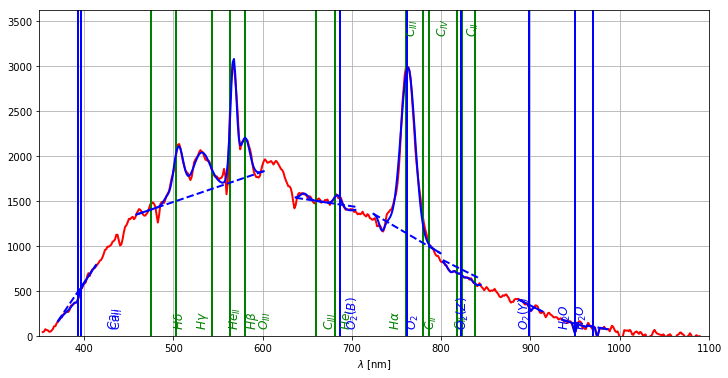

2018-03-14 15:02:36  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./outputs/trim_20170605_007_spectrum.fits


In [4]:
parameters.VERBOSE=True
Spectractor(filename,output_directory,guess,target)

In case of a suspected bug, user can enter the DEBUG mode, that gives more plots and outputs to check where the code may do something wrong. Note that VERBOSE mode is included in the DEBUG mode.

2018-03-14 15:02:41  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-14 15:02:41  Image      load                 INFO   
	Loading image ./fits/trim_20170605_007.fits...
2018-03-14 15:02:41  Image      load                 INFO   
	Image loaded
2018-03-14 15:02:41  Image      load                 INFO   
	Loading disperser Thor300...


Load disperser Thor300:
	from ../dispersers/Thor300
Grating characteristics:
	N = 299.51 +/- 0.99 grooves/mm
	Average tilt of -0.6 degrees


2018-03-14 15:02:41  urllib3.connectionpool _make_request        DEBUG  http://simbad.u-strasbg.fr:80 "POST /simbad/sim-script HTTP/1.1" 200 None
2018-03-14 15:02:41  spectractor Spectractor          INFO   
	Search for the target in the image...


MAIN_ID       RA           DEC      RA_PREC ... SP_TYPE_3 SP_QUAL_3 SP_BIBCODE_3
           "h:m:s"       "d:m:s"            ...                                 
------- ------------- ------------- ------- ... --------- --------- ------------
 3C 273 12 29 06.6951 +02 03 08.662       9 ...                                 


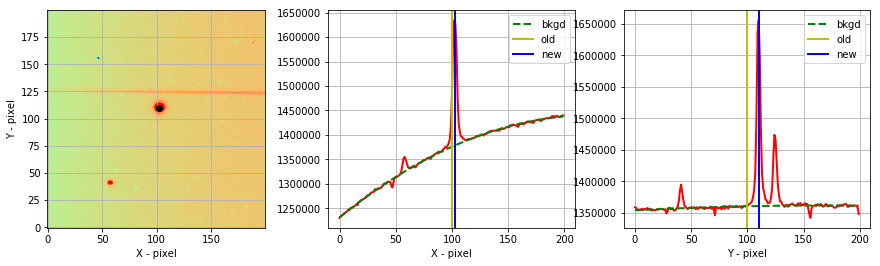

2018-03-14 15:02:42  Image      find_target          INFO   
	X,Y target position in pixels: 747.340,653.093


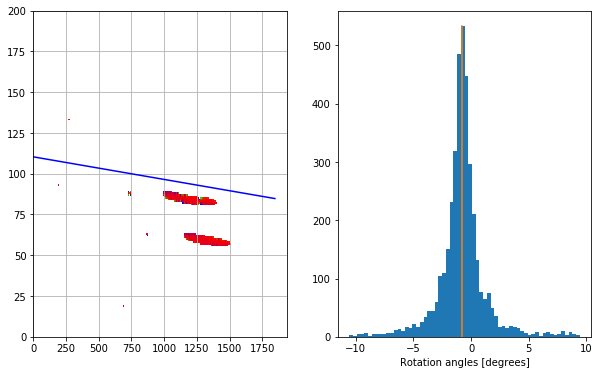

2018-03-14 15:02:42  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.79 degree


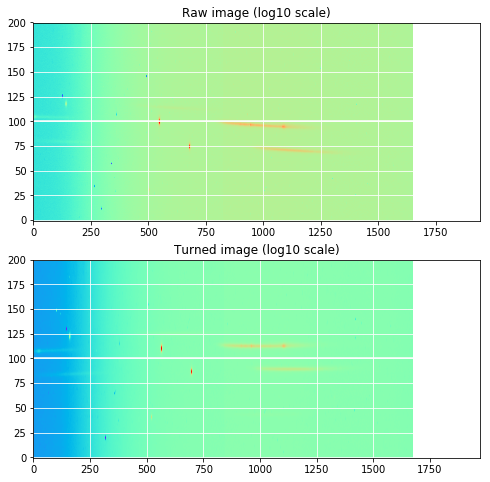

2018-03-14 15:02:44  spectractor Spectractor          INFO   
	Search for the target in the rotated image...


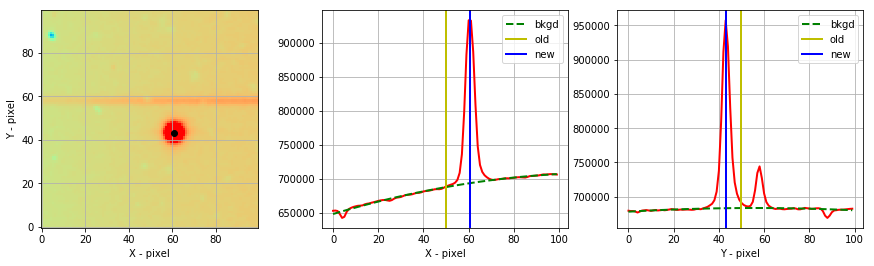

2018-03-14 15:02:44  Image      find_target          INFO   
	X,Y target position in pixels: 766.522,663.101
2018-03-14 15:02:44  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-14 15:02:44  Spectrum   __init__             INFO   
	Spectrum info copied from Image


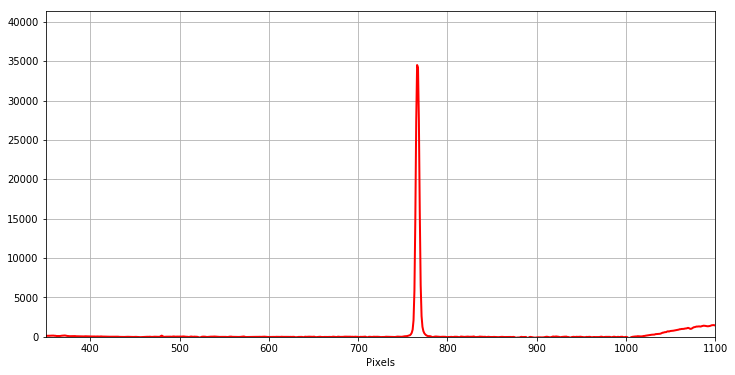

2018-03-14 15:02:45  Spectrum   calibrate            WARNING 
	Manual settings for tests
2018-03-14 15:02:45  Spectrum   calibrate            INFO   
	Calibrating order 1 spectrum...


   Line   Tabulated  Detected    Shift       FWHM    Amplitude     SNR   
              nm        nm         nm         nm                         
--------- --------- --------- ----------- ---------- ---------- ---------
$Ca_{II}$   393.366 386.27368   -7.092309  16.298452 -59.788128 4.6473556
$Ca_{II}$   396.847 391.86203  -4.9849763   4.077017 -55.730053 4.3319197
$H\gamma$ 502.71912 505.17908   2.4599397 12.9515505    582.976 10.238502
$He_{II}$ 542.79767 530.74207  -12.055573      23.55   444.5206 7.8068814
 $H\beta$ 563.30023  566.7847   3.4845011   7.914548  1350.8981 23.725111
$O_{III}$ 579.98035  579.6484 -0.33198014  12.619044   443.3587 7.7864757
 $He_{I}$  680.5242 683.68036   3.1561966   9.569411  122.32108  5.759117
$H\alpha$  760.2179 762.21277   1.9948812  18.600628  1856.5413 31.064545
 $C_{IV}$ 817.78735  814.0067  -3.7806256  5.3005776   72.71691  9.525621
 $C_{II}$ 823.57904  820.0352  -3.5437922   9.081177  169.45418 22.197813
 $O_2(Z)$   822.696 825.64136   2.9453

2018-03-14 15:02:50  Spectrum   calibrate            INFO   
	Wavelenght total shift: 3.71nm (after 4 steps)
	with D = 55.21 mm (DISTANCE2CCD = 55.45 +/- 0.19 mm, -1.3 sigma shift)


   Line   Tabulated  Detected    Shift       FWHM    Amplitude     SNR   
              nm        nm         nm         nm                         
--------- --------- --------- ----------- --------- ----------- ---------
$Ca_{II}$   393.366  386.6235   -6.742497  16.31292   -59.78876  4.647412
$Ca_{II}$   396.847  392.2167   -4.630289  4.080573  -55.729893  4.331914
$H\gamma$ 502.71912 505.63367    2.914538 12.966431   582.98895 10.238407
$He_{II}$ 542.79767  531.2179  -11.579744     23.55   444.59064  7.807866
 $H\beta$ 563.30023  567.2901   3.9898288   7.92118   1350.8528 23.723572
$O_{III}$ 579.98035  580.1643  0.18396541 12.627024    443.2772 7.7847996
 $He_{I}$  680.5242 684.28107   3.7569206  9.576665   122.31925 5.7590275
$H\alpha$  760.2179 762.87585   2.6579893 18.615047   1856.5427 31.064703
 $C_{IV}$ 817.78735  814.4867  -3.3006437  4.884152   56.915707 7.4025245
 $C_{II}$ 823.57904   820.387  -3.1920295  9.879721   175.81358 22.866524
 $O_2(Z)$   822.696 826.41675   3.7207

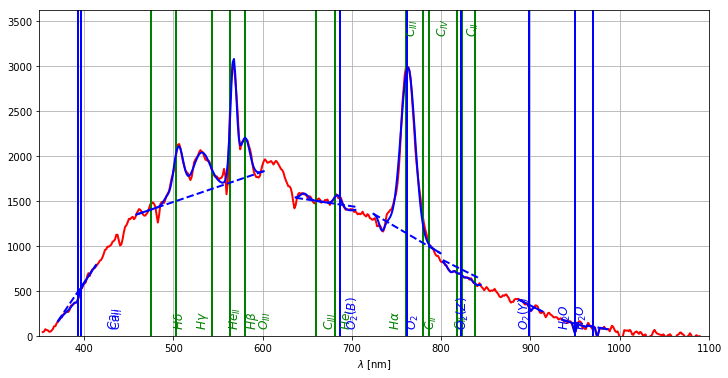

2018-03-14 15:02:52  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./outputs/trim_20170605_007_spectrum.fits


In [5]:
parameters.DEBUG=True
Spectractor(filename,output_directory,guess,target)

### Image and Spectrum classes

The Image and Spectrum classes have methods to load, save and plot images/spectra, and specific methods to extract the spectrum from the image. For instance, to load and plot the output spectrum, one can use:

2018-03-09 11:57:52  Spectrum   load_spectrum        INFO   
	Spectrum loaded from ./outputs/trim_20170605_007_spectrum.fits


MAIN_ID       RA           DEC      RA_PREC ... SP_TYPE_4 SP_QUAL_4 SP_BIBCODE_4
           "h:m:s"       "d:m:s"            ...                                 
------- ------------- ------------- ------- ... --------- --------- ------------
 3C 273 12 29 06.6951 +02 03 08.662       9 ...                                 
Loading target 3C273 from NED...


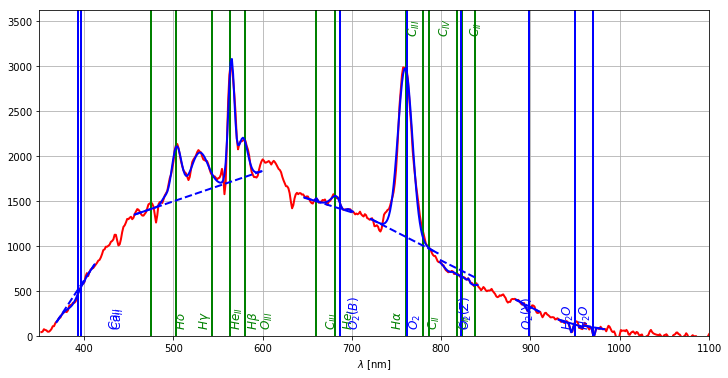

In [6]:
spec = Spectrum('./outputs/trim_20170605_007_spectrum.fits')
spec.plot_spectrum()

### Spectractor settings

Some settings parameters are defined in the XWINDOW python file. For instance the half-width (in pixel) of the search windows to find the object in the images are set by:

In [7]:
print 'Width of search window along X in pixels:',parameters.XWINDOW
print 'Width of search window along Y in pixels:',parameters.YWINDOW

Width of search window along X in pixels: 100
Width of search window along Y in pixels: 100


and in the rotated images by:

In [8]:
print 'Width of search window along X in pixels:',parameters.XWINDOW_ROT
print 'Width of search window along Y in pixels:',parameters.YWINDOW_ROT

Width of search window along X in pixels: 50
Width of search window along Y in pixels: 50


The edges of the output spectrum are floats specified by the LAMBDA_MIN and LAMBDA_MAX parameters (in nanometers):

In [9]:
print 'Minimum wavelenght:',parameters.LAMBDA_MIN,'nm'
print 'Maximum wavelenght:',parameters.LAMBDA_MAX,'nm'

Minimum wavelenght: 350 nm
Maximum wavelenght: 1100 nm
